In [19]:
import yfinance as yf
import investpy as ip
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from functools import reduce

In [20]:
lista_ativos = ['VALE3.SA','TAEE11.SA','SLCE3.SA','CASH3.SA','CVBI11.SA','VRTA11.SA']

df = pd.DataFrame()

for stocks in lista_ativos:
    df[stocks] = yf.download(stocks,
                            start = '2021-09-13',
                            end = '2021-12-21')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
search_result = ip.search_quotes(text = 'bvsp',
                                products = ['indices'],
                                countries = ['brazil'],
                                n_results = 50)

for search_result in search_result[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [22]:
ibov = search_result.retrieve_historical_data(from_date = '13/09/2021',
                                                to_date = '21/12/2021')['Close']
ibov = pd.DataFrame(ibov).rename(columns = {'Close' : 'IBOV'})

In [23]:
ivvb11 = ip.get_etf_historical_data(etf = 'fundo de invest ishares sp 500',
                                    country = 'brazil',
                                    from_date = '13/09/2021',
                                    to_date = '21/12/2021')['Close']

ivvb11 = pd.DataFrame(ivvb11).rename(columns={'Close' : 'IVVB11'})

In [24]:
dfs = [df, ibov, ivvb11]
df_final = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)

df_final.head()

,VALE3.SA,TAEE11.SA,SLCE3.SA,CASH3.SA,CVBI11.SA,VRTA11.SA,IBOV,IVVB11
Date,,,,,,,,
2021-09-13,85.842880,36.030235,40.327271,6.69,101.769997,107.889999,116404.0,252.85
2021-09-14,85.235924,36.510254,40.036362,7.70,101.500000,107.820000,116181.0,254.00
2021-09-15,83.107071,35.982235,40.109089,7.73,101.650002,108.800003,115063.0,255.65
2021-09-16,79.655602,35.847832,40.309090,7.37,101.800003,108.500000,113794.0,256.35
2021-09-17,78.043098,35.636620,39.900002,7.11,101.500000,108.300003,111439.0,254.52


In [25]:
day_over_day = df_final.pct_change()
day_over_day = pd.DataFrame(day_over_day)

day_over_day.head()

,VALE3.SA,TAEE11.SA,SLCE3.SA,CASH3.SA,CVBI11.SA,VRTA11.SA,IBOV,IVVB11
Date,,,,,,,,
2021-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-14,-0.007071,0.013323,-0.007214,0.150972,-0.002653,-0.000649,-0.001916,0.004548
2021-09-15,-0.024976,-0.014462,0.001817,0.003896,0.001478,0.009089,-0.009623,0.006496
2021-09-16,-0.041530,-0.003735,0.004986,-0.046572,0.001476,-0.002757,-0.011029,0.002738
2021-09-17,-0.020243,-0.005892,-0.010149,-0.035278,-0.002947,-0.001843,-0.020695,-0.007139


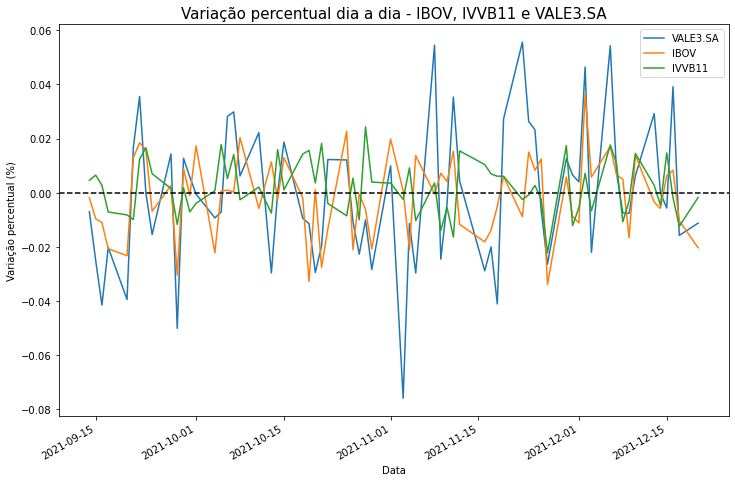

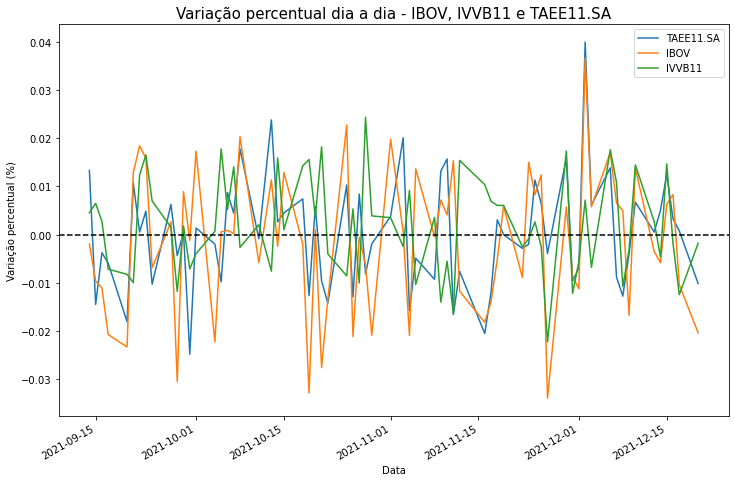

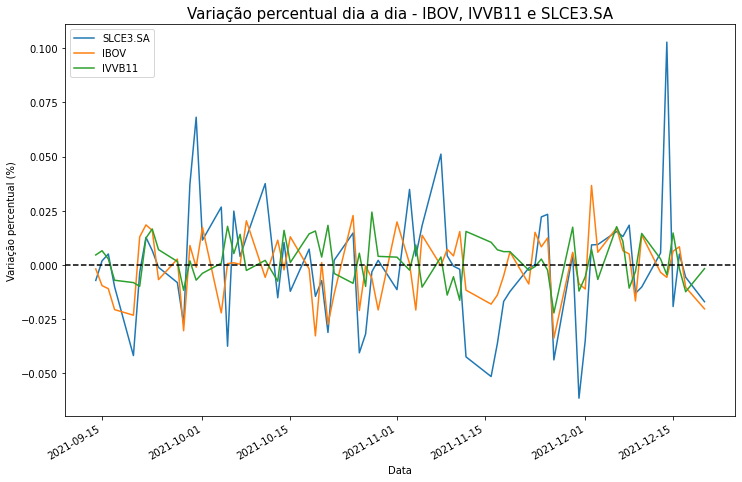

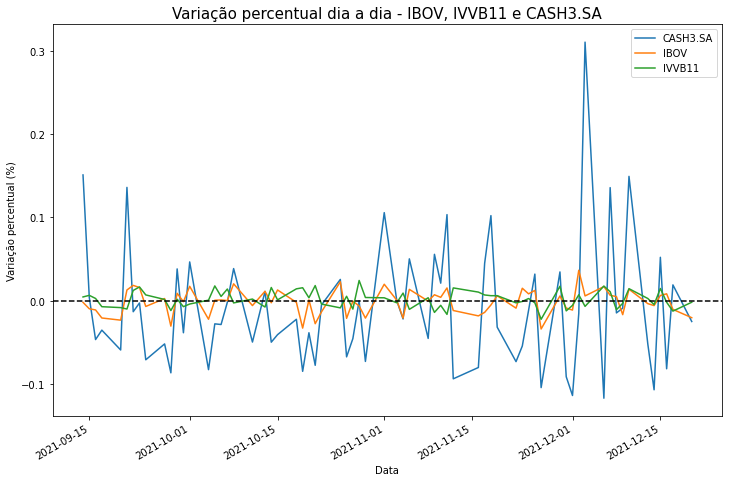

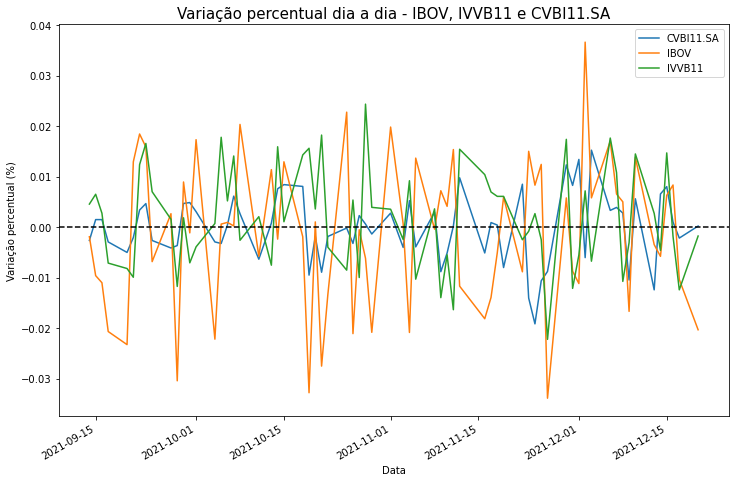

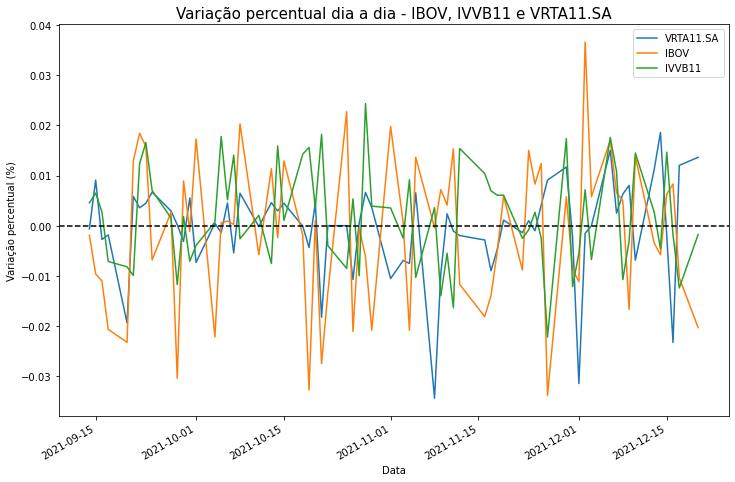

In [26]:
for stocks in lista_ativos:
    day_over_day_plt = day_over_day[[stocks, 'IBOV', 'IVVB11']]
    day_over_day_plt.plot(figsize = [12,8]);
    plt.title('Variação percentual dia a dia - IBOV, IVVB11 e '+stocks, fontsize = 15)
    plt.xlabel('Data')
    plt.ylabel('Variação percentual (%)')
    plt.axhline(y=0, color='black', linestyle='--')


    plt.show()